<a href="https://colab.research.google.com/github/Bollapally-Manish-Kumar/AI-PROJECT-YHILLS/blob/main/Iris_Flower_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean

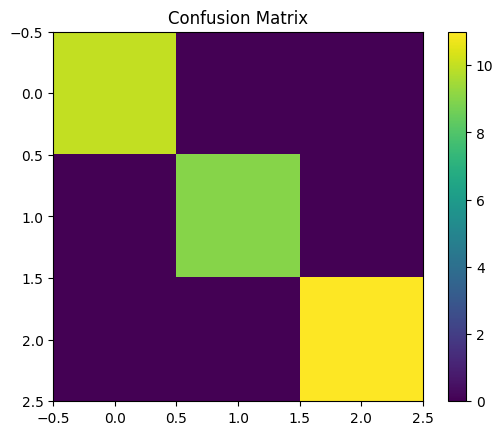

In [2]:
# Iris Flower Classification
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from zipfile import ZipFile

with ZipFile('/content/iris.zip') as z:
    with z.open('iris.data') as f:
        iris_data = pd.read_csv(f, names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'])

print(iris_data.head())
print(iris_data.info())
print(iris_data.describe())

# Scale and normalize the features
scaler = StandardScaler()
iris_data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']] = scaler.fit_transform(iris_data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])

# Split the data into training and testing sets
X = iris_data.drop('species', axis=1)
y = iris_data['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Implement and train a random forest classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

# Evaluate the performance of the model
y_pred = rfc.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Visualize the results using a confusion matrix
plt.imshow(confusion_matrix(y_test, y_pred), interpolation='nearest')
plt.title("Confusion Matrix")
plt.colorbar()
plt.show()